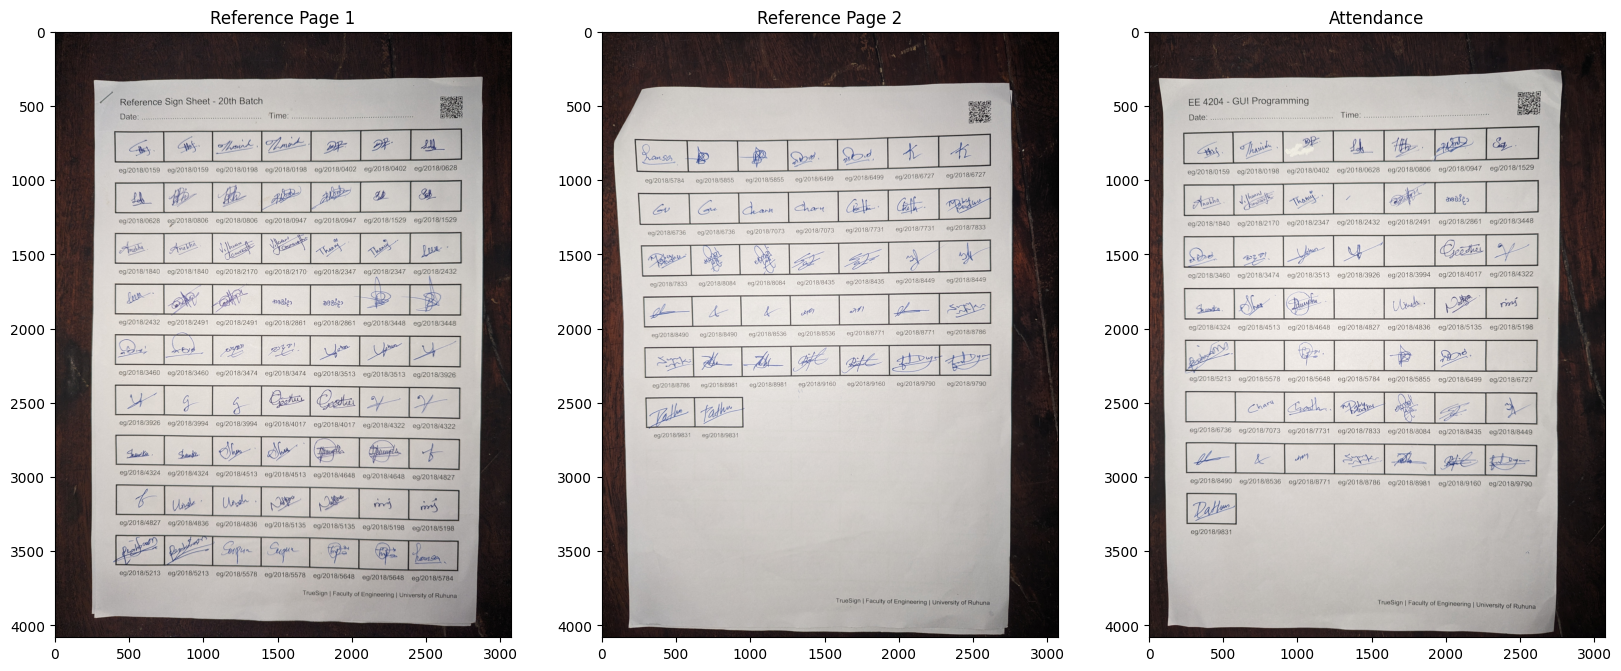

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


# Read image
attendance_img = cv2.imread("./images/attendance.jpg")
ref_1_img = cv2.imread("./images/ref_1.jpg")
ref_2_img = cv2.imread("./images/ref_2.jpg")

# Convert to RGB
attendance_img = cv2.cvtColor(attendance_img, cv2.COLOR_BGR2RGB)
ref_1_img = cv2.cvtColor(ref_1_img, cv2.COLOR_BGR2RGB)
ref_2_img = cv2.cvtColor(ref_2_img, cv2.COLOR_BGR2RGB)

# Show image
f, ax = plt.subplots(1, 3, figsize=(20, 10))
ax[0].imshow(ref_1_img)
ax[1].imshow(ref_2_img)
ax[2].imshow(attendance_img)

# set title
ax[0].set_title("Reference Page 1")
ax[1].set_title("Reference Page 2")
ax[2].set_title("Attendance")

plt.show()

In [22]:
def detectCorners(original: np.ndarray):
    # resize image to 500x500
    new_size = 500
    scale_factor = new_size / original.shape[0]
    img = cv2.resize(original, (new_size, new_size))

    # convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # guassian blur
    blur = cv2.GaussianBlur(gray, (5, 5), 0)

    # canny edge detection
    edges = cv2.Canny(blur, 50, 150, apertureSize=3)

    # dilate
    kernel = np.ones((5, 5), np.uint8)
    edges = cv2.dilate(edges, kernel, iterations=1)

    # erode
    edges = cv2.erode(edges, kernel, iterations=1)

    # find contours
    contours, hierarchy = cv2.findContours(
        edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )

    # find the biggest contour
    biggest = 0
    max_area = 0
    for i in range(len(contours)):
        area = cv2.contourArea(contours[i])
        if area > max_area:
            max_area = area
            biggest = i

    # draw the biggest contour
    cv2.drawContours(img, contours, biggest, (0, 255, 0), 3)

    # get the corners by approxyPolyDP
    epsilon = 0.1 * cv2.arcLength(contours[biggest], True)
    corners = cv2.approxPolyDP(contours[biggest], epsilon, True)

    # sort corners
    corners = corners.reshape(4, 2)
    corners = corners[np.argsort(corners[:, 0])]
    if corners[0][1] > corners[1][1]:
        corners[[0, 1]] = corners[[1, 0]]
    if corners[2][1] < corners[3][1]:
        corners[[2, 3]] = corners[[3, 2]]

    # scale corners back to original size
    corners = corners / scale_factor  # type: ignore

    return (corners, img)

[[   0.     24.48]
 [ 163.2  3998.4 ]
 [3614.88 4039.2 ]
 [3680.16  269.28]]
[[ 350.88  326.4 ]
 [ 350.88 3941.28]
 [3761.76 3965.76]
 [3818.88  310.08]]
[[ 342.72  399.84]
 [ 236.64 4014.72]
 [3590.4  4071.84]
 [3639.36  350.88]]


Text(0.5, 1.0, 'Attendance')

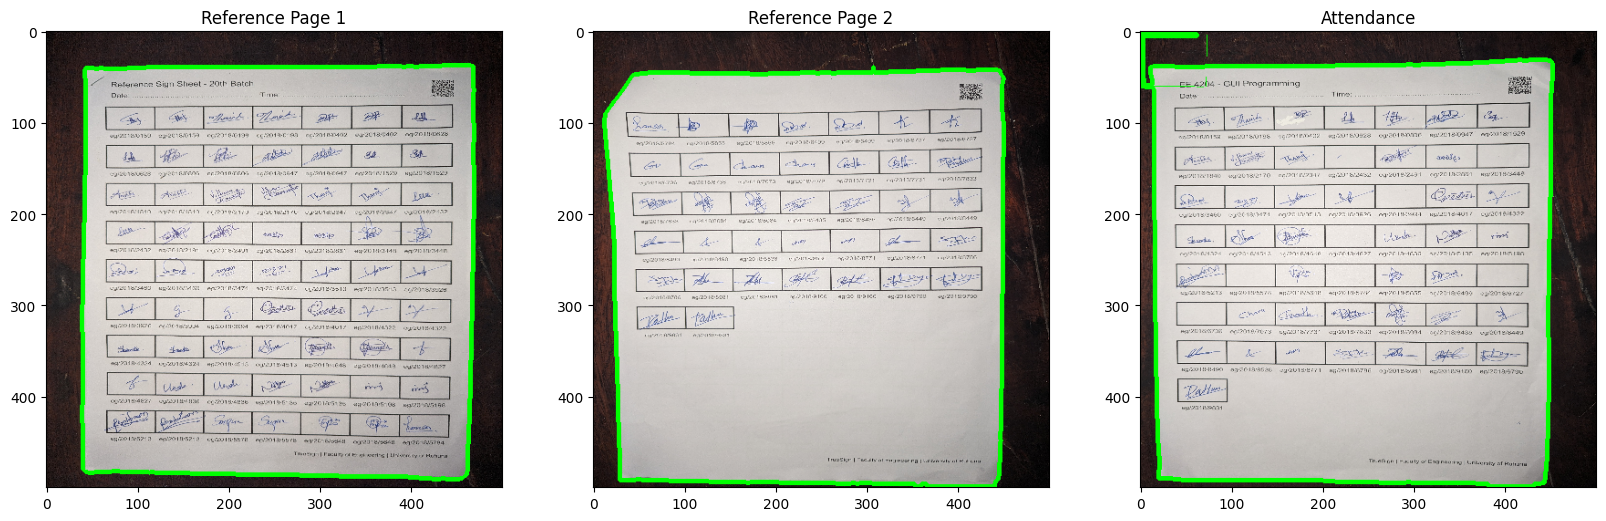

In [21]:
attendace_cornered = detectCorners(attendance_img)
ref_1_cornered = detectCorners(ref_1_img)
ref_2_cornered = detectCorners(ref_2_img)

# Show image
f, ax = plt.subplots(1, 3, figsize=(20, 10))
ax[0].imshow(ref_1_cornered[1])
ax[1].imshow(ref_2_cornered[1])
ax[2].imshow(attendace_cornered[1])

# set title
ax[0].set_title("Reference Page 1")
ax[1].set_title("Reference Page 2")
ax[2].set_title("Attendance")